In [2]:
# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
sns.set_style("darkgrid") # set a grey grid as a background

# ML imports
import sklearn
from sklearn import metrics
# Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Logistic Regression
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# K Means Clustering

# turn off warnings
import warnings
warnings.filterwarnings('ignore')



**K Means Clustering** allows you to *classify unlabelled data* with an *unsupervised* machine learning Algorithm.

It attempts to group similar clusters together in data. 

**What Does A Typical Clustering Problem look like?**  
- Cluster similar documents
- Cluster Customers together based on Feature
- Market Segmentation
- Identify Similar Physical Groups


The overall goal is to *divide data into distinct groups such that observations within each group are similar*

**How does the algorithm work?**  
- Choose a number of clusters *K*
- Randomly assign each point to a cluster
- Until Clusters stop changing, repeat the following:
1. for each cluster, compute the *Cluster Centroid* by taking the mean vector of the points in the cluster
2. assign each data point to the cluster for which the *Centroid* is closest.

**Choosing a K Value**  
- There is no easy way to choose a "best" K value
- One way to do so is the *Elbow Method* (recall KNN)

*The Elbow Method*  
- compute the *Sum Of Squared Error* (SSE) for some values of K (2,4,6,8, etc)
- the SSE is defined as *the sum of the squared distance between each member of the cluster and its centroid*

If you plot *K* against the SSE you'll see that the *error decreases* as *K* gets larger. This is because *when the number of clusters increases they should be smaller, so the distortion is also smaller*. 

The idea of the *Elbow Method* is to *choose the K at which the SSE decreases abruptly*. 

This produces the *Elbow Effect*. 

![Elbow Effect](https://www.researchgate.net/profile/Chirag_Deb/publication/320986519/figure/fig8/AS:560163938422791@1510564898246/Result-of-the-elbow-method-to-determine-optimum-number-of-clusters.png)


You want to choose a value of K where you *won't get that much more information by increasing the number of clusters*.

 *There is no "correct" K value, so each case must use your domain experience to find good solutions*.
 
 



### Creating Artificial Data to work with

In [4]:
# Import the make_blobs built-in dataset
# Generates blob-like groups of artificial data to test unsupervised learning schemes.
from sklearn.datasets import make_blobs


In [6]:
# Create a data object with various parameters
data = make_blobs(n_samples=200,n_features=2,
                  centers=4,cluster_std=1.8,
                  random_state=101)

In [7]:
# Notice that the data is an array of Tuples
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [9]:
# Each element is a numpy array
data[0]

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [12]:
# 200 rows of 2 columns
data[0].shape

(200, 2)

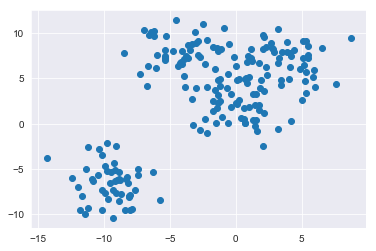

In [13]:
# Plot out the blobs
# get data[0], all the rows in the first column. 
# Plot then against all the rows in the second column
# Notice that this groups to roughly 2 blobs, though we specified 4 'centers'
plt.scatter(data[0][:,0],data[0][:,1])

In [19]:
# These are the Labels that groups the 4 'centers'.
# Since we made this data artificially (centers=4), we can examine them. 
# This wouldn't be possible with real data.
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

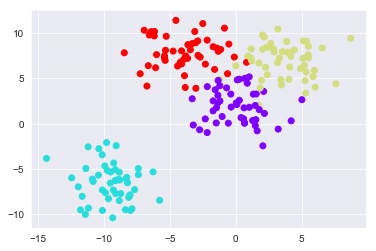

In [16]:
# Add a c value of the labels (data[1]) to break apart the 'groups'
plt.scatter(data[0][:,0],data[0][:,1],c=data[1 ],cmap='rainbow')

### Using the K Means Clustering Algorithm

In [20]:
from sklearn.cluster import KMeans


In [49]:
# Instantiate a KMeans object
# Since we created the data on our own we know there are 4 centers
# You can toggle this to various numbers to see how k-means will divide them
kmeans = KMeans(n_clusters=10)

In [50]:
# Fit kmeans to the features (in this case data[0])
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
# We can see where the Predicted cluster centers are
# This could be plotted.
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [-0.0336134 ,  5.54542558]])

In [41]:
# More importantly we can dump the Predicted labels the model believes are the clusters.
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1], dtype=int32)

If we were working in the real world, we'd be done because we couldn't compare the labels to the real values. (i.e. We performed the process because we didn't know how many clusters (labels) there were in the real data. ) 

Since this is artificial data - we can compare how well the KMeans did. 

Notice where there's overlap and 'noisiness' the algorithm couldn't detect where to divide them

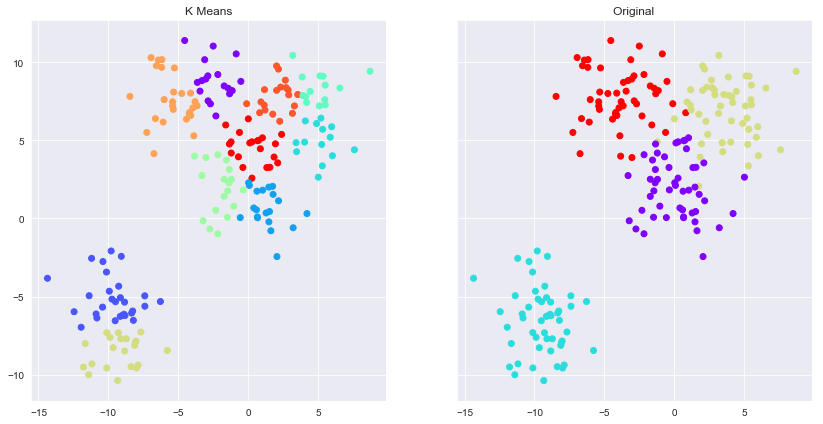

In [51]:
# Plotting the comparison
# Note the use of Tuple Unpacking with matplotlib
# Creating a subplot of 1 row by 2 columns, share the same y axis
fig,(ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(14,7))
# This plots the predictions
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
# This plots the originals (real values)
ax2.set_title('Original ')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
